In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
name=[]
first_initial=[]
gender=[]
num_babies_with_name=[]
year=[]

In [3]:
start_year = 1960
end_year = 1971
year_processed = start_year

for i in range(start_year, end_year):
    filename = "yob" + str(year_processed) + ".txt"
    
    file1 = open(filename,"r")

    for x in file1:
        a, b, c = x.split(",")
        name.append(a)
        first_initial.append(a[0])
        gender.append(b)
        num_babies_with_name.append(int(c.replace("\n","")))
        year.append(year_processed)
    file1.close
    
    year_processed += 1

In [4]:
df = pd.DataFrame({
    "Year": year,
    "Name": name,
    "First Initial": first_initial,
    "Gender": gender,
    "Num Babies With Name": num_babies_with_name
})

df = df.drop(df[df.Name==10947].index)
df.sort_values(by="Name").head()

,Year,Name,First Initial,Gender,Num Babies With Name
93048,1967,Aaron,A,M,2912
31846,1962,Aaron,A,M,2016
50839,1964,Aaron,A,F,29
87961,1967,Aaron,A,F,19
133576,1970,Aaron,A,M,6582


In [5]:
total_babies = df['Num Babies With Name'].sum()
print("Total Babies: ", total_babies)
total_female_babies = df[df['Gender']=='F']['Num Babies With Name'].sum()
print("Total Female Babies: ", total_female_babies)
total_male_babies = df[df['Gender']=='M']['Num Babies With Name'].sum()
print("Total Male Babies: ", total_male_babies)

Total Babies:  41134616
Total Female Babies:  20011425
Total Male Babies:  21123191


In [6]:
print(df[(df['Name']=='Baxter') ])

        Year    Name First Initial Gender  Num Babies With Name
8732    1960  Baxter             B      M                    32
21088   1961  Baxter             B      M                    24
33499   1962  Baxter             B      M                    20
45674   1963  Baxter             B      M                    22
57909   1964  Baxter             B      M                    27
70382   1965  Baxter             B      M                    18
82782   1966  Baxter             B      M                    13
94853   1967  Baxter             B      M                    17
108008  1968  Baxter             B      M                    13
121186  1969  Baxter             B      M                    17
135929  1970  Baxter             B      M                    15


In [7]:
female_names = df[df['Gender']=='F'].groupby("Name")['Num Babies With Name'].sum().reset_index()
print("Num female names: ", len(female_names))
top_5_female_names = female_names.sort_values(by="Num Babies With Name", ascending=False).head(5)
top_5_female_names

Num female names:  15124


,Name,Num Babies With Name
8345,Lisa,535939
9453,Mary,374427
13099,Susan,303392
6662,Karen,302748
7157,Kimberly,293212


In [8]:
male_names = df[df['Gender']=='M'].groupby("Name")['Num Babies With Name'].sum().reset_index()
print("Num male names: ", len(male_names))
top_5_male_names = male_names.sort_values(by="Num Babies With Name", ascending=False).head(5)
top_5_male_names

Num male names:  8385


,Name,Num Babies With Name
5588,Michael,918519
1900,David,795784
4124,John,772025
3816,James,746610
6704,Robert,708045


In [9]:
perc_females_with_top_names = pd.DataFrame({
    "Name": list(top_5_female_names["Name"]),
    "Percentage": list(top_5_female_names["Num Babies With Name"] / total_female_babies * 100)
})
perc_females_with_top_names.head()

,Name,Percentage
0,Lisa,2.678165
1,Mary,1.871066
2,Susan,1.516094
3,Karen,1.512876
4,Kimberly,1.465223


In [10]:
perc_males_with_top_names = pd.DataFrame({
    "Name": list(top_5_male_names["Name"]),
    "Percentage": list(top_5_male_names["Num Babies With Name"] / total_male_babies * 100)
})
perc_males_with_top_names.head()

,Name,Percentage
0,Michael,4.348391
1,David,3.767347
2,John,3.654869
3,James,3.534551
4,Robert,3.351979


In [11]:
# For top 5 female names, create lists with name, year, and num occurrences of name for that year
name_list=[]
year_list=[]
num_occurrences_list=[]

for name, num in top_5_female_names.iterrows():
    for i in range(start_year, end_year):
        name_list.append(num[0])
        year_list.append(i)
        num_occurrences_list.append(df[(df['Name']== num[0]) & (df['Gender']=='F') & (df['Year']== i)]['Num Babies With Name'].sum())
        

In [12]:
top5_female_data = pd.DataFrame({
    "Name": name_list,
    "Year": year_list,
    "Num Occurences": num_occurrences_list
})

top5_female_data.head(12)

,Name,Year,Num Occurences
0,Lisa,1960,33702
1,Lisa,1961,42702
2,Lisa,1962,46078
3,Lisa,1963,56040
4,Lisa,1964,54275
5,Lisa,1965,60269
6,Lisa,1966,56914
7,Lisa,1967,52435
8,Lisa,1968,49532
9,Lisa,1969,45029


In [13]:
top5_female_data[(top5_female_data['Name']=='Michael') & (top5_female_data['Year']==start_year)]['Num Occurences'].sum()

0

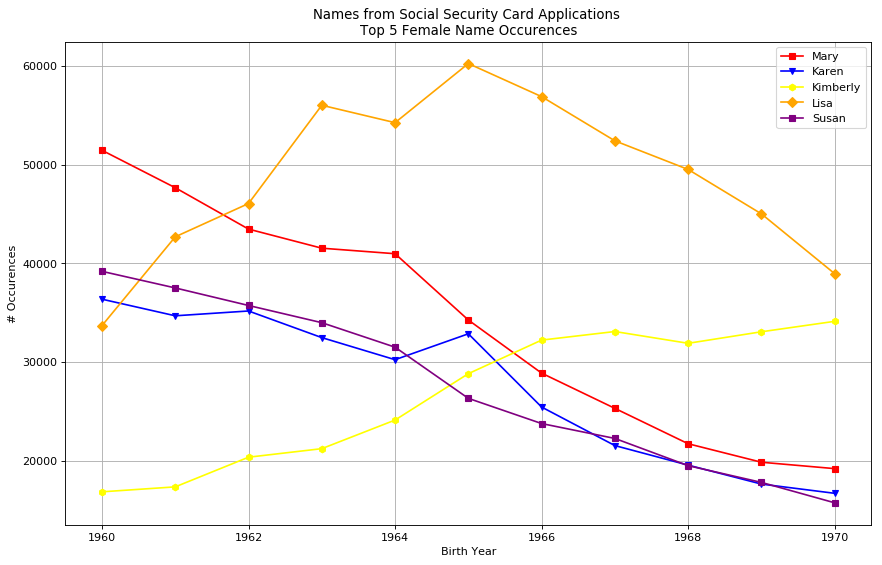

<Figure size 432x288 with 0 Axes>

In [14]:
Top5Names = set(name_list)

plt.figure(figsize=(13, 8), dpi=80)
x_axis = list(np.arange(start_year, end_year, 1))
plt.grid()
plt.title("Names from Social Security Card Applications \nTop 5 Female Name Occurences")
plt.xlabel("Birth Year")
plt.ylabel("# Occurences")

count=0
for name in Top5Names:
    y_axis=[]
    count += 1
    for i in range(start_year, end_year):
        y_axis.append(top5_female_data[(top5_female_data['Name']==name) & (top5_female_data['Year']==i)]['Num Occurences'].sum())
   
    LegendName = name
    if count==1:
        color="red"
        marker="s"
    elif count==2:
        color="blue"
        marker="v"
    elif count ==3:
        color = "yellow"
        marker="h"
    elif count == 4:
        color= "orange"
        marker="D"
    else:
        color = "purple"
        marker="s"
    
    plt.plot(x_axis, y_axis, marker=marker,color=color, linewidth=1.5, label=LegendName) 

plt.legend()
plt.show()  
plt.savefig("Top 5 Female Names.png")

In [15]:
# For top 5 male names, create lists with name, year, and num occurrences of name for that year
name_list=[]
year_list=[]
num_occurrences_list=[]

for name, num in top_5_male_names.iterrows():
    for i in range(start_year, end_year):
        name_list.append(num[0])
        year_list.append(i)
        num_occurrences_list.append(df[(df['Name']== num[0]) & (df['Gender']=='M') & (df['Year']== i)]['Num Babies With Name'].sum())
        

In [16]:
top5_male_data = pd.DataFrame({
    "Name": name_list,
    "Year": year_list,
    "Num Occurences": num_occurrences_list
})

top5_male_data.head(12)

,Name,Year,Num Occurences
0,Michael,1960,84180
1,Michael,1961,86917
2,Michael,1962,85034
3,Michael,1963,83782
4,Michael,1964,82646
5,Michael,1965,81021
6,Michael,1966,79990
7,Michael,1967,82436
8,Michael,1968,82008
9,Michael,1969,85203


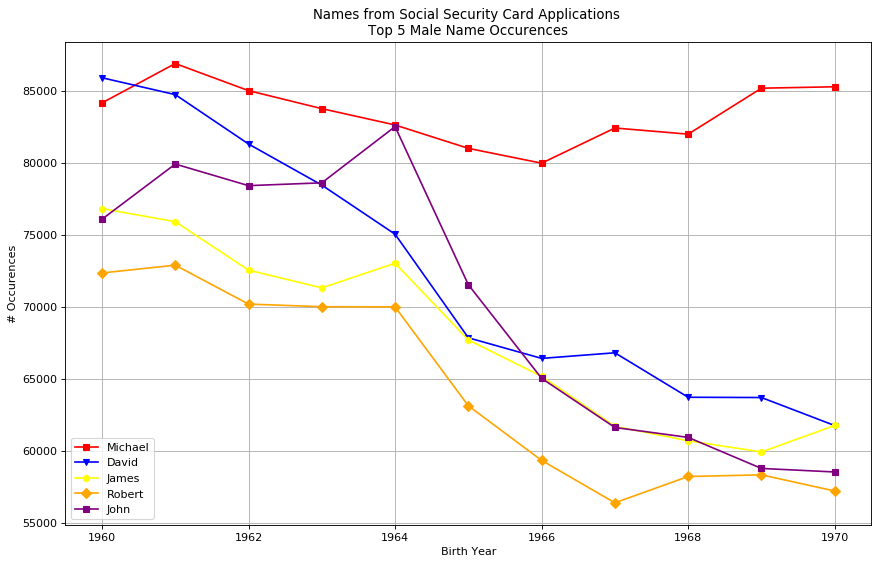

<Figure size 432x288 with 0 Axes>

In [17]:
Top5Names = set(name_list)

plt.figure(figsize=(13, 8), dpi=80)
x_axis = list(np.arange(start_year, end_year, 1))
plt.grid()
plt.title("Names from Social Security Card Applications \nTop 5 Male Name Occurences")
plt.xlabel("Birth Year")
plt.ylabel("# Occurences")

count=0
for name in Top5Names:
    y_axis=[]
    count += 1
    for i in range(start_year, end_year):
        y_axis.append(top5_male_data[(top5_male_data['Name']==name) & (top5_male_data['Year']==i)]['Num Occurences'].sum())
   
    LegendName = name
    if count==1:
        color="red"
        marker="s"
    elif count==2:
        color="blue"
        marker="v"
    elif count ==3:
        color = "yellow"
        marker="h"
    elif count == 4:
        color= "orange"
        marker="D"
    else:
        color = "purple"
        marker="s"
    
    plt.plot(x_axis, y_axis, marker=marker,color=color, linewidth=1.5, label=LegendName) 

plt.legend()
plt.show()    
plt.savefig("Top 5 Male Names.png")

In [18]:
num_per_year_F = df[df['Gender']=='F'].groupby(['Gender', 'Year'])['Num Babies With Name'].sum().reset_index()
num_per_year_F

,Gender,Year,Num Babies With Name
0,F,1960,2022010
1,F,1961,2017637
2,F,1962,1966553
3,F,1963,1927306
4,F,1964,1894774
5,F,1965,1765043
6,F,1966,1691917
7,F,1967,1650873
8,F,1968,1640208
9,F,1969,1686959


In [19]:
num_per_year_M = df[df['Gender']=='M'].groupby(['Gender', 'Year'])['Num Babies With Name'].sum().reset_index()
num_per_year_M

,Gender,Year,Num Babies With Name
0,M,1960,2132155
1,M,1961,2122664
2,M,1962,2068612
3,M,1963,2031353
4,M,1964,1992978
5,M,1965,1860820
6,M,1966,1783673
7,M,1967,1744172
8,M,1968,1738587
9,M,1969,1789069


In [20]:
combined = num_per_year_F.merge(num_per_year_M, on="Year")
combined = combined.rename (columns={'Num Babies With Name_x': 'Female', 'Num Babies With Name_y': 'Male'})
combined = combined.set_index('Year')
combined

,Gender_x,Female,Gender_y,Male
Year,,,,
1960,F,2022010,M,2132155
1961,F,2017637,M,2122664
1962,F,1966553,M,2068612
1963,F,1927306,M,2031353
1964,F,1894774,M,1992978
1965,F,1765043,M,1860820
1966,F,1691917,M,1783673
1967,F,1650873,M,1744172
1968,F,1640208,M,1738587


<Figure size 800x320 with 0 Axes>

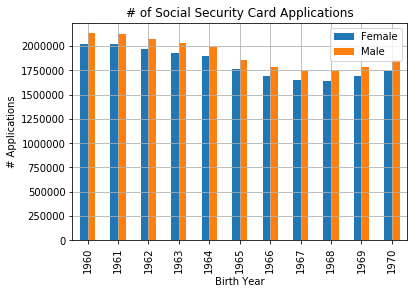

<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure(figsize=(10, 4), dpi=80)
combined[['Female','Male']].plot(kind='bar')

plt.grid()
plt.title("# of Social Security Card Applications")
plt.xlabel("Birth Year")
plt.ylabel("# Applications")

plt.legend()
plt.show()
plt.savefig("Male vs Female Totals.png")

In [22]:
first_initial_grouped_F = df[df['Gender']=='F'].groupby("First Initial")['Num Babies With Name'].sum().reset_index()
first_initial_grouped_F

,First Initial,Num Babies With Name
0,A,1145444
1,B,780779
2,C,1780142
3,D,1733630
4,E,532557
5,F,117216
6,G,351805
7,H,207390
8,I,72670
9,J,1711811


In [23]:
first_initial_grouped_M = df[df['Gender']=='M'].groupby("First Initial")['Num Babies With Name'].sum().reset_index()
first_initial_grouped_M

,First Initial,Num Babies With Name
0,A,893795
1,B,981663
2,C,1208774
3,D,2260431
4,E,634497
5,F,285017
6,G,870660
7,H,240883
8,I,43340
9,J,3287178


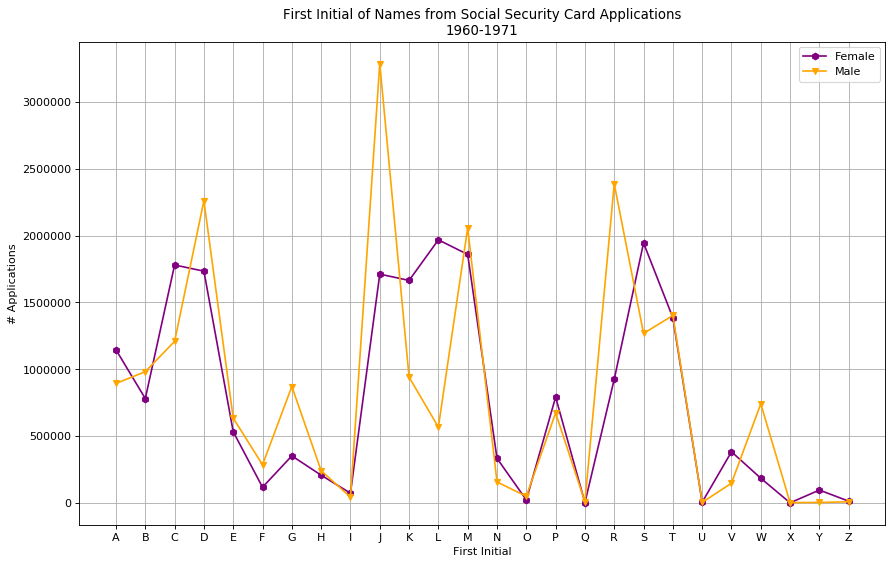

<Figure size 432x288 with 0 Axes>

In [24]:
plt.figure(figsize=(13, 8), dpi=80)
plt.grid()
plt.title(f"First Initial of Names from Social Security Card Applications\n{start_year}-{end_year}")
plt.xlabel("First Initial")
plt.ylabel("# Applications")

plt.plot(list(first_initial_grouped_F['First Initial']), first_initial_grouped_F['Num Babies With Name'], marker="h", color="purple", linewidth=1.5,label="Female")
plt.plot(list(first_initial_grouped_M['First Initial']), first_initial_grouped_M['Num Babies With Name'], marker="v", color="orange", linewidth=1.5,label="Male")
plt.legend()
plt.show()
plt.savefig("First Initials.png")

In [25]:
df = df.rename(columns={"Num Babies With Name":"Num Occurences of Name"})
df.head()

,Year,Name,First Initial,Gender,Num Occurences of Name
0,1960,Mary,M,F,51475
1,1960,Susan,S,F,39203
2,1960,Linda,L,F,37311
3,1960,Karen,K,F,36380
4,1960,Donna,D,F,34132


In [26]:
first_hundred = df.head(100)
first_hundred.to_html("Data Source.html")

In [27]:
df[(df['Name']=='Michael')]

,Year,Name,First Initial,Gender,Num Occurences of Name
544,1960,Michael,M,F,318
7332,1960,Michael,M,M,84180
12466,1961,Michael,M,F,325
19450,1961,Michael,M,M,86917
24623,1962,Michael,M,F,354
31688,1962,Michael,M,M,85034
36812,1963,Michael,M,F,377
43975,1963,Michael,M,M,83782
49159,1964,Michael,M,F,302
56398,1964,Michael,M,M,82646


In [28]:
len(df)

138955